<a href="https://colab.research.google.com/github/SAHILLNEGII/SAHILLNEGII/blob/main/Hugging_Face_%2B_Computer_Vision_Google's_Vision_Transformer_(ViT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latest Version of `transformers` from 🤗 Model Hub

In [1]:
pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-_6qnyd5g
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-_6qnyd5g
  Resolved https://github.com/huggingface/transformers.git to commit a3d69a8994d673899608a7c17fbf4f953f50474e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.47.0.dev0-py3-none-any.whl size=10053259 sha256=8edfa690d185e2912b9dcccb3a848918ec173e2da77b4ce1fc1e987e860c8d89
  Stored in directory: /tmp/pip-ephem-wheel-cache-1i12y__8/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2


# import required Libs

In [2]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

# Download Image from the given URL

In [3]:
url = input("Enter Image URL: ")

Enter Image URL: https://www.redfrogphotography.co.uk/wp-content/uploads/2021/02/Gorgeously-cute-photo-of-a-pekingese-cross-with-a-terrier-with-its-tonge-out-taken-by-Karen-Riches-1536x1434.jpg


In [4]:
image = Image.open(requests.get(url, stream=True).raw)

# Display image

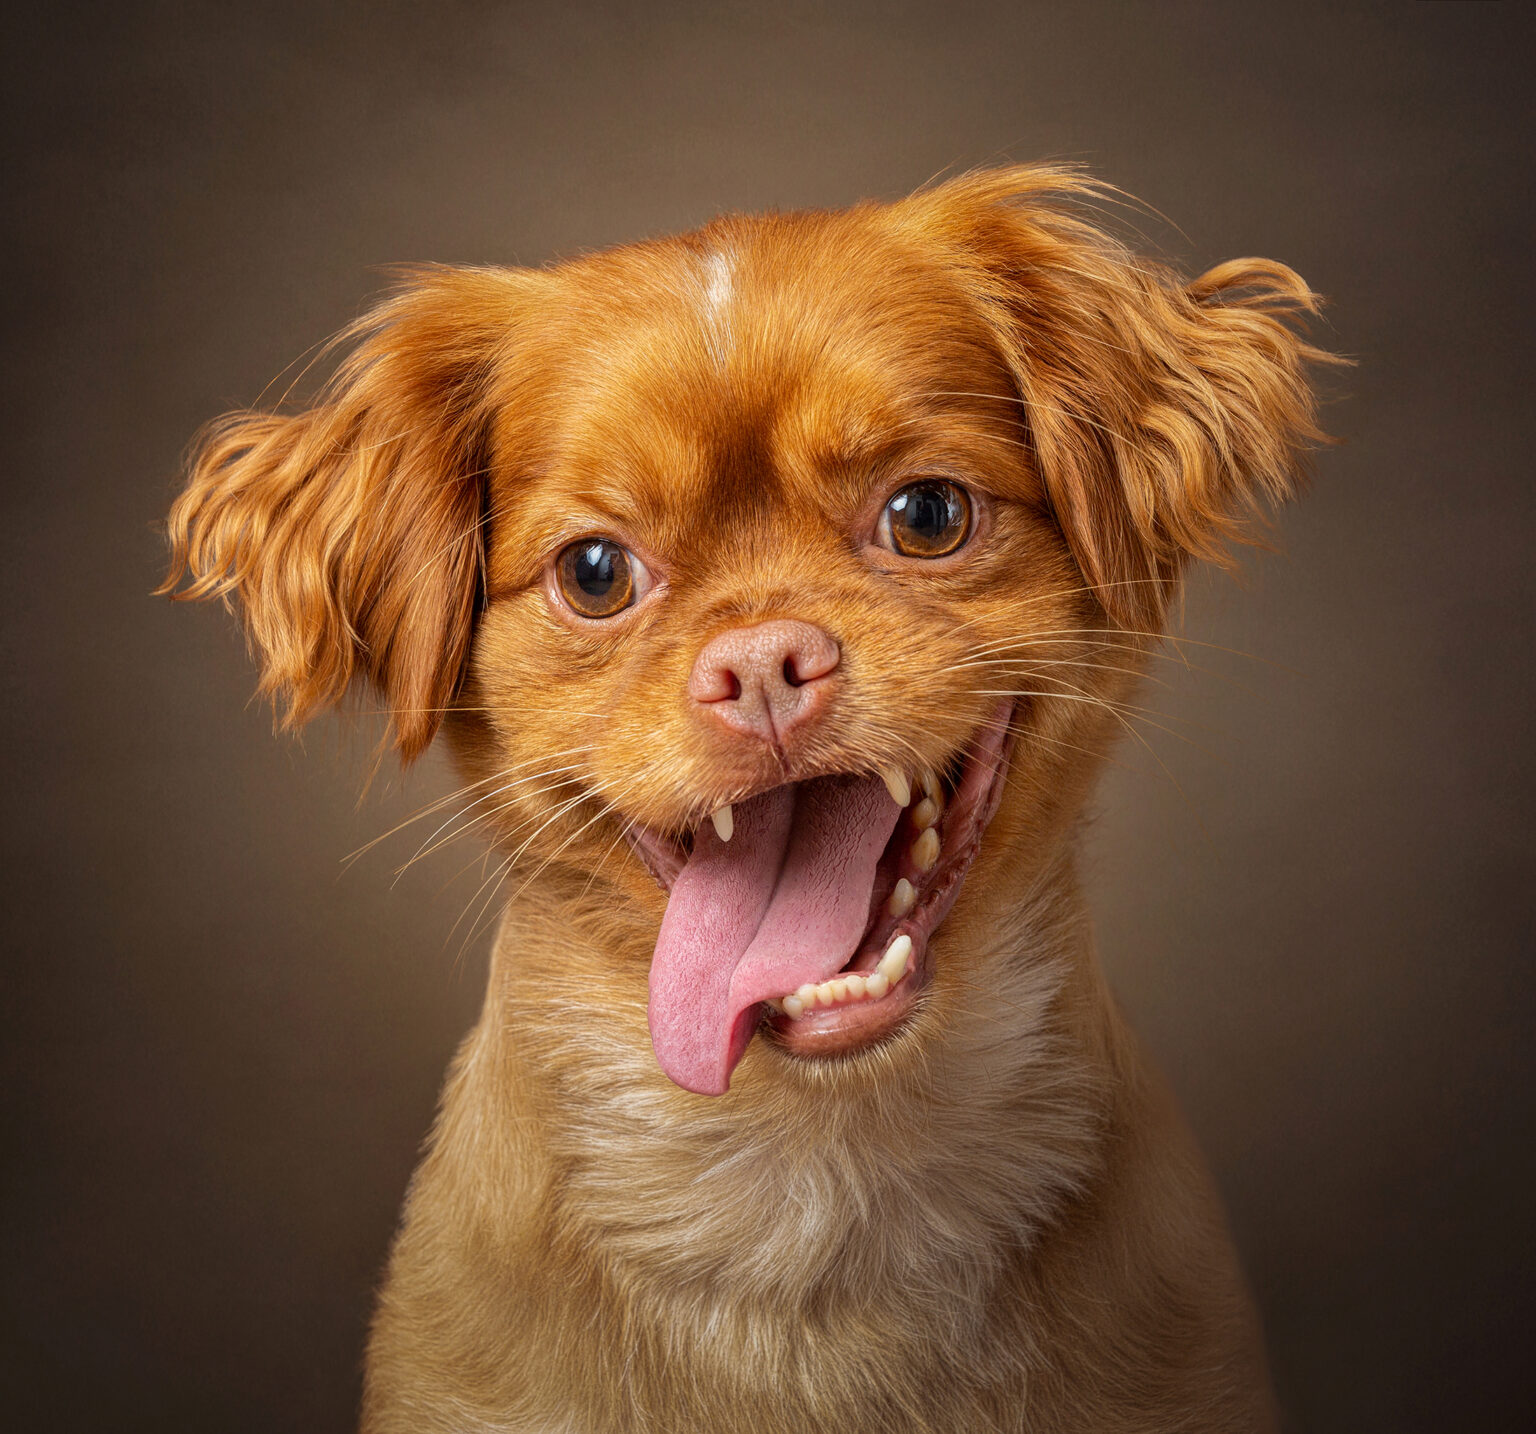

In [5]:
display(image)


# Download Pre-trained Model

In [6]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

# Extract Features

In [7]:
inputs = feature_extractor(images=image, return_tensors="pt")


# Model Inference

In [8]:
outputs = model(**inputs)


In [9]:
logits = outputs.logits


# model predicts one of the 1000 ImageNet classes

In [10]:

predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Brittany spaniel
